In [1]:
# installing package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from numpy import random
from numpy import mean
from numpy import std
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
import lightgbm as lgb
import optuna
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.feature_selection import SelectFromModel
# importing data
# data import -- google colab
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'
#df = pd.read_csv(file_path)
# data import -- jupyter notebook
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df = df.rename(columns={'family_history_with_overweight': 'FHWO', 'NObeyesdad' : 'Obesity Level',})
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
for i in cat_cols:
    col_val = sorted(list(set(df[i].tolist())))
    replace_num = []
    for j in range(len(col_val)):
        replace_num.append(j)
    df[i].replace(col_val,replace_num, inplace=True)
outlier_index = [18, 21, 25, 30, 68, 92, 119, 132, 133, 142, 152, 188, 191, 200, 217, 232, 236, 245, 252, 277, 333, 495]
df_remove_outliers = df
df = df.drop(outlier_index)
df = df.reset_index(drop=True)
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])

target_name = 'Obesity Level'
y = df[target_name]
columns = ['Height', 'Weight']
df.drop(columns, inplace=True, axis=1)

In [2]:
from pycaret.classification import *
s = setup(data = df, target = 'Obesity Level', session_id = 123, train_size = 0.8)


,Description,Value
0,Session id,123
1,Target,Obesity Level
2,Target type,Multiclass
3,Original data shape,"(2089, 15)"
4,Transformed data shape,"(2089, 15)"
5,Transformed train set shape,"(1671, 15)"
6,Transformed test set shape,"(418, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [3]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8618,0.9773,0.8618,0.8685,0.8616,0.8385,0.8397,0.1010
et,Extra Trees Classifier,0.8414,0.9749,0.8414,0.8460,0.8396,0.8147,0.8160,0.0790
lightgbm,Light Gradient Boosting Machine,0.8384,0.9750,0.8384,0.8469,0.8384,0.8112,0.8127,4.0020
gbc,Gradient Boosting Classifier,0.7935,0.9619,0.7935,0.8001,0.7916,0.7588,0.7604,0.4610
dt,Decision Tree Classifier,0.7481,0.8533,0.7481,0.7513,0.7465,0.7057,0.7067,0.0120
knn,K Neighbors Classifier,0.7325,0.9262,0.7325,0.7287,0.7082,0.6869,0.6932,0.0240
lr,Logistic Regression,0.5907,0.8711,0.5907,0.5831,0.5685,0.5208,0.5267,0.8050
lda,Linear Discriminant Analysis,0.5745,0.8663,0.5745,0.5652,0.5447,0.5014,0.5090,0.0140
ridge,Ridge Classifier,0.5386,0.0000,0.5386,0.5390,0.4887,0.4588,0.4720,0.0090
svm,SVM - Linear Kernel,0.4482,0.0000,0.4482,0.4118,0.3687,0.3544,0.3893,0.0230


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

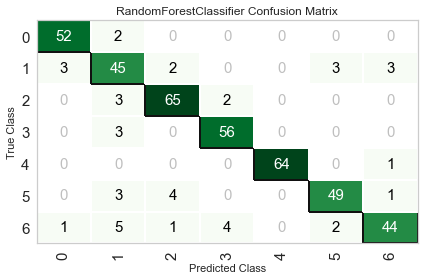

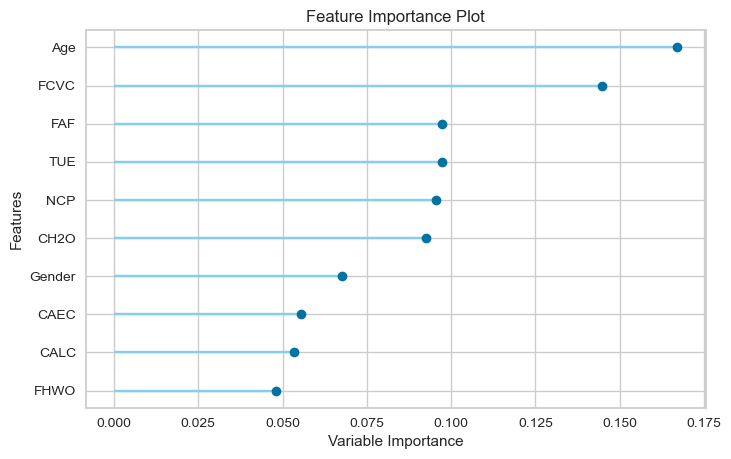

In [4]:
plot_model(best, plot = 'confusion_matrix')
plot_model(best, plot = 'feature')

In [5]:
pred = predict_model(best)
new_df = df.copy()
new_df.drop('Obesity Level', axis=1, inplace=True)
save_model(best, 'pipeline')
loaded_best_pipeline = load_model('pipeline')
loaded_best_pipeline

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8971,0.9864,0.8971,0.8992,0.8971,0.8798,0.8802


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/64/5d7vw4210hb8m9mp1y61t16m0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Gender', 'Age', 'FHWO', 'FAVC',
                                             'FCVC', 'NCP', 'CAEC', 'SMOKE',
                                             'CH2O', 'SCC', 'FAF', 'TUE',
                                             'CALC', 'MTRANS'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=na...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [6]:
best_acc_models_top3 = compare_models(sort = 'Accuracy', n_select = 3)
best_acc_models_top3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8618,0.9773,0.8618,0.8685,0.8616,0.8385,0.8397,0.1350
et,Extra Trees Classifier,0.8414,0.9749,0.8414,0.8460,0.8396,0.8147,0.8160,0.0900
lightgbm,Light Gradient Boosting Machine,0.8384,0.9750,0.8384,0.8469,0.8384,0.8112,0.8127,4.0360
gbc,Gradient Boosting Classifier,0.7935,0.9619,0.7935,0.8001,0.7916,0.7588,0.7604,0.4780
dt,Decision Tree Classifier,0.7481,0.8533,0.7481,0.7513,0.7465,0.7057,0.7067,0.0130
knn,K Neighbors Classifier,0.7325,0.9262,0.7325,0.7287,0.7082,0.6869,0.6932,0.0200
lr,Logistic Regression,0.5907,0.8711,0.5907,0.5831,0.5685,0.5208,0.5267,0.1320
lda,Linear Discriminant Analysis,0.5745,0.8663,0.5745,0.5652,0.5447,0.5014,0.5090,0.0130
ridge,Ridge Classifier,0.5386,0.0000,0.5386,0.5390,0.4887,0.4588,0.4720,0.0110
svm,SVM - Linear Kernel,0.4482,0.0000,0.4482,0.4118,0.3687,0.3544,0.3893,0.0240


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 LGBM

Random Forest Model:
Train accuracy: 1.0
Test accuracy: 0.8636363636363636
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9434    0.8333    0.8850        60
           1     0.6056    0.8269    0.6992        52
           2     0.9259    0.7812    0.8475        64
           3     0.9375    0.9524    0.9449        63
           4     1.0000    0.9865    0.9932        74
           5     0.8163    0.7692    0.7921        52
           6     0.8333    0.8491    0.8411        53

    accuracy                         0.8636       418
   macro avg     0.8660    0.8570    0.8576       418
weighted avg     0.8781    0.8636    0.8672       418



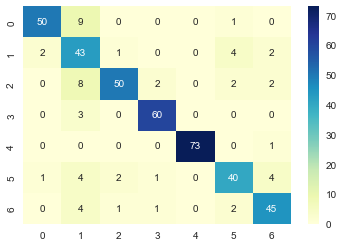

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)

report_best = classification_report(test_labels, rfc_pred, digits=4)
cm = confusion_matrix(test_labels, rfc_pred)
cm_matrix = pd.DataFrame(data=cm)
sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print('Random Forest Model:')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)

print('Classification Report of Random Forest Classifier : \n', report_best)

LightGBM Model:
Train accuracy: 1.0
Test accuracy: 0.8660287081339713
Classification Report: 
               precision    recall  f1-score   support

           0     0.9815    0.8833    0.9298        60
           1     0.6056    0.8269    0.6992        52
           2     0.8929    0.7812    0.8333        64
           3     0.9677    0.9524    0.9600        63
           4     0.9730    0.9730    0.9730        74
           5     0.8750    0.8077    0.8400        52
           6     0.7925    0.7925    0.7925        53

    accuracy                         0.8660       418
   macro avg     0.8697    0.8596    0.8611       418
weighted avg     0.8804    0.8660    0.8700       418



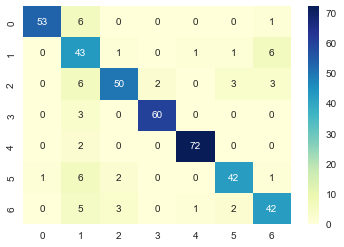

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective='multiclass',
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0, verbose= -100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
test_score = accuracy_score(y_pred, y_test)
y_pred_train = clf.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print('LightGBM Model:')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print("Classification Report: \n", metrics.classification_report(y_test, y_pred, digits=4))

Extra Tree Classifier Model:
Train accuracy: 1.0
Test accuracy: 0.8444976076555024
Classification Report: 
               precision    recall  f1-score   support

           0     0.9231    0.8000    0.8571        60
           1     0.6207    0.6923    0.6545        52
           2     0.8361    0.7969    0.8160        64
           3     0.9219    0.9365    0.9291        63
           4     1.0000    0.9865    0.9932        74
           5     0.7500    0.8077    0.7778        52
           6     0.8148    0.8302    0.8224        53

    accuracy                         0.8445       418
   macro avg     0.8381    0.8357    0.8357       418
weighted avg     0.8503    0.8445    0.8463       418



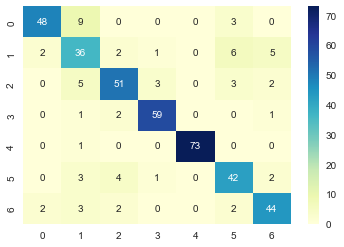

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
test_score = accuracy_score(y_pred, y_test)
y_pred_train = clf.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print('Extra Tree Classifier Model:')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print("Classification Report: \n", metrics.classification_report(y_test, y_pred, digits=4))

In [10]:
# lgb Nested Cross Validation
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
outer_scores = []
selected_features_all_folds = []
fold_number = 1
for train_ix, test_ix in cv_outer.split(X):
    X_train_fold, X_test_fold = X[train_ix], X[test_ix]
    y_train_fold, y_test_fold = y[train_ix], y[test_ix]

    cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(random_state=123, verbose=-100)

    param_grid = {
        'boosting_type': ['gbdt'],
        'num_leaves': [31, 41, 51],
        'n_estimators': [100, 200]
    }

    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train_fold, y_train_fold)

    feature_selector = SelectFromModel(result.best_estimator_, threshold='median')
    X_train_selected = feature_selector.fit_transform(X_train_fold, y_train_fold)
    X_test_selected = feature_selector.transform(X_test_fold)

    best_model = result.best_estimator_
    best_model.fit(X_train_selected, y_train_fold)

    y_pred = best_model.predict(X_test_selected)
    accuracy = accuracy_score(y_test_fold, y_pred)
    outer_scores.append(accuracy)

    selected_feature_indices = feature_selector.get_support(indices=True)
    selected_features = [features[i] for i in selected_feature_indices if i < len(features)]
    selected_features_all_folds.append(selected_features)

    print(f'Fold {fold_number}: acc={accuracy:.4f}, est={result.best_score_:.4f}, cfg={result.best_params_}, selected_features={list(selected_features)}')
    fold_number += 1

print(f'Accuracy: {np.mean(outer_scores):.4f} ({np.std(outer_scores):.4f})')

Fold 1: acc=0.7943, est=0.8511, cfg={'boosting_type': 'gbdt', 'n_estimators': 200, 'num_leaves': 41}, selected_features=['Age', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE']
Fold 2: acc=0.7656, est=0.8404, cfg={'boosting_type': 'gbdt', 'n_estimators': 200, 'num_leaves': 41}, selected_features=['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']
Fold 3: acc=0.8278, est=0.8426, cfg={'boosting_type': 'gbdt', 'n_estimators': 200, 'num_leaves': 31}, selected_features=['Age', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE']
Fold 4: acc=0.8038, est=0.8447, cfg={'boosting_type': 'gbdt', 'n_estimators': 100, 'num_leaves': 41}, selected_features=['Age', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE']
Fold 5: acc=0.7943, est=0.8500, cfg={'boosting_type': 'gbdt', 'n_estimators': 100, 'num_leaves': 51}, selected_features=['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']
Fold 6: acc=0.7943, est=0.8585, cfg={'boosting_type': 'gbdt', 'n_estimators': 200, 'num_leaves': 51}, selected_features=['Age', 'FCVC',

In [11]:
# Extra Tree NCV
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

cv_outer = KFold(n_splits=10, shuffle=True, random_state=123)
outer_scores = []
selected_features_all_folds = []
fold_number = 1

for train_ix, test_ix in cv_outer.split(X):
    X_train_fold, X_test_fold = X[train_ix], X[test_ix]
    y_train_fold, y_test_fold = y[train_ix], y[test_ix]

    cv_inner = KFold(n_splits=3, shuffle=True, random_state=123)
    model = ExtraTreesClassifier(random_state=123)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train_fold, y_train_fold)

    feature_selector = SelectFromModel(result.best_estimator_, threshold='median')
    X_train_selected = feature_selector.fit_transform(X_train_fold, y_train_fold)
    X_test_selected = feature_selector.transform(X_test_fold)

    best_model = result.best_estimator_
    best_model.fit(X_train_selected, y_train_fold)

    y_pred = best_model.predict(X_test_selected)
    accuracy = accuracy_score(y_test_fold, y_pred)
    outer_scores.append(accuracy)

    selected_feature_indices = feature_selector.get_support(indices=True)
    selected_features = [features[i] for i in selected_feature_indices if i < len(features)]
    selected_features_all_folds.append(selected_features)

    print(f'Fold {fold_number}: acc={accuracy:.4f}, est={result.best_score_:.4f}, cfg={result.best_params_}, selected_features={list(selected_features)}')
    fold_number += 1

print(f'Accuracy: {np.mean(outer_scores):.4f} ({np.std(outer_scores):.4f})')

Fold 1: acc=0.8182, est=0.8415, cfg={'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, selected_features=['Age', 'Gender', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Fold 2: acc=0.8086, est=0.8442, cfg={'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, selected_features=['Age', 'Gender', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Fold 3: acc=0.7656, est=0.8420, cfg={'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, selected_features=['Age', 'Gender', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Fold 4: acc=0.7990, est=0.8346, cfg={'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, selected_features=['Age', 'Gender', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Fold 5: acc=0.7656, est=0.8271, cfg={'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split'